In [73]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

size = 100000

down = np.random.choice([4], size=size)

quarter = np.random.choice([1, 2, 3, 4], size=size)

yardsToGo = np.random.exponential(scale=3, size=size).astype(int) + 1

max_yardlineNumber = 95

yardlineNumber = np.minimum(np.random.exponential(scale=15, size=size).astype(int) + 1, max_yardlineNumber)  

defendersInTheBox = np.round(np.clip(np.random.normal(loc=6, scale=1.5, size=size), 3, 11)).astype(int)

numberOfPassRushers = np.round(np.clip(np.random.normal(loc=4, scale=1, size=size), 0, 8)).astype(int)

HomeScoreBeforePlay = np.zeros(size).astype(int)
VisitorScoreBeforePlay = np.zeros(size).astype(int)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

for i in range(size):
    
    q1 = [0,3,6,7,10,13,14]
    q2 = [0,3,6,7,10,13,14,17,20,21,23,24]
    q3 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34]
    q4 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34,37,40,42]
    
    if quarter[i] == 1:
        HomeScoreBeforePlay[i] = np.random.choice(q1)
        VisitorScoreBeforePlay[i] = np.random.choice(q1)
    elif quarter[i] == 2:
        HomeScoreBeforePlay[i] = np.random.choice(q2)
        VisitorScoreBeforePlay[i] = np.random.choice(q2)
    elif quarter[i] == 3:
        HomeScoreBeforePlay[i] = np.random.choice(q3)
        VisitorScoreBeforePlay[i] = np.random.choice(q3)
    else:
        HomeScoreBeforePlay[i] = np.random.choice(q4)
        VisitorScoreBeforePlay[i] = np.random.choice(q4)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

PlayResult = np.zeros(size).astype(int)
x = truncnorm(-5,80, loc=5, scale=5)
playresults = x.rvs(size).astype(int)

PlayResult = playresults
    
for i in range(size):
    
    if PlayResult[i] >= yardsToGo[i]:
        if PlayResult[i] > yardlineNumber[i]:
            PlayResult[i] = yardlineNumber[i]
            if np.random.choice([True, False]):
                HomeScoreAfterPlay[i] += 6
                if np.random.random() < .946:    # NFL 2022 extra point %
                    HomeScoreAfterPlay[i] += 1
            else:
                VisitorScoreAfterPlay[i] += 6
                if np.random.random() < .946:
                    VisitorScoreAfterPlay[i] += 1

PassLength = np.zeros(size).astype(int)
YardsAfterCatch = np.zeros(size).astype(int)

for i in range(size):
    if PlayResult[i] == 0:
        YardsAfterCatch[i] = 0
        PassLength[i] = 0
    elif PlayResult[i] < 0:
        x = random.choice([-1,0])
        PassLength[i] = x
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
    else:
        PassLength[i] = random.randint(1, abs(PlayResult[i]))
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
firstDown_Conversion = np.zeros(size).astype(int)

for i in range(size):
    
    if PlayResult[i] > yardsToGo[i]:
        firstDown_Conversion[i] += 1

newdata = pd.DataFrame({
    'down': down,
    'quarter': quarter,
    'yardsToGo': yardsToGo,
    'yardlineNumber': yardlineNumber,
    'defendersInTheBox': defendersInTheBox,
    'numberOfPassRushers': numberOfPassRushers,
    'HomeScoreBeforePlay': HomeScoreBeforePlay,
    'HomeScoreAfterPlay': HomeScoreAfterPlay,
    'VisitorScoreBeforePlay': VisitorScoreBeforePlay,
    'VisitorScoreAfterPlay': VisitorScoreAfterPlay,
    'PassLength': PassLength,
    'YardsAfterCatch': YardsAfterCatch,
    'PlayResult': PlayResult,
    'firstDown_Conversion': firstDown_Conversion
})

newdata = newdata.dropna()
newdata.to_csv('generated_data.csv', index=False)

In [71]:
newdata

,down,quarter,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreBeforePlay,VisitorScoreAfterPlay,PassLength,YardsAfterCatch,PlayResult,firstDown_Conversion
0,4,2,1,27,6,3,0,0,23,23,2,4,6,1
1,4,1,1,28,5,6,14,14,13,13,6,0,6,1
2,4,2,2,24,8,5,10,10,0,0,1,2,3,1
3,4,1,5,5,10,3,14,14,3,10,2,3,5,0
4,4,1,1,10,4,3,7,7,7,7,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,4,1,16,7,4,14,14,23,23,10,1,11,1
99996,4,1,8,14,6,4,6,6,6,6,6,1,7,0
99997,4,3,8,31,9,3,14,14,10,10,1,0,1,0
99998,4,2,1,5,5,6,23,23,3,10,1,4,5,1


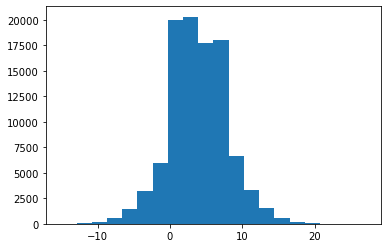

In [72]:
plt.hist(PlayResult, bins=20)
plt.show()